# Homework 3: Visualizing Data with Movies

Name: Nathan Johnson   

Date: 9/11/2024

#### Overview
In this homework, you'll create a movie visualization of a model parameter such as temperature, salinity, velocity, or any other field which may be of interest to you. 

As an example, I've provided a movie of circulation in the Equatorial Pacific from the NASA ECCO Version 5 State Estimate. For the purposes of this visualization, I subsetted the Equatorial Pacific is the region between 155-75$^{\circ}$W and $\pm$20$^{\circ}$N.

#### Import Modules
Import the modules required to access data from netCDF files, plot it, and stitch panels together into a movie:

In [17]:
# import modules here
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cm
import moviepy.video.io.ImageSequenceClip

## Part 1: Download Data
To begin this exercise, download all of the available data for your variable of interest over the timespan of interest.

For the example provided, I've used daily sea surface temperature data for a given year (2015) from the ECCO Version 5 Alpha output [HERE](https://ecco.jpl.nasa.gov/drive/files/Version5/Alpha/latlon_daily/SST.nc).

To obtain your data, use the [Downloading ECCO Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20Data.ipynb) notebook provided with the course notes. Be sure to edit the fields to obtain the correct data.

In [4]:
# define the path to the data folder
data_folder = 'D:/DATA'

## Part 2: Create a Single Plot of Sea Surface Temperature
Before making a movie, its useful to fine tune a single plot to get the details right. Once you've got your plot lookin' good, you can loop through all of the data to generate the panels of your movie.

Here, make a plot of one variable field. 

Begin by reading in the longitude, latitude, and SST fields from the netCDF file:

In [7]:
# read in the data
theta_file = os.path.join(data_folder,'ECCO','Version4','Release4',
                          'interp_monthly','THETA','THETA_2003_01.nc')

ds = xr.open_dataset(theta_file)
longitude = np.array(ds['longitude'][:])
latitude = np.array(ds['latitude'][:])
Z = np.array(ds['Z'][:])
Theta = np.array(ds['THETA'][:])
ds.close()

In [8]:
print(np.shape(Theta))
ds

(1, 50, 360, 720)


<xarray.Dataset>
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 2003-01-16T12:00:00
    latitude   (j) float64 ...
    longitude  (i) float64 ...
    Z          (k) float32 ...
    timestep   (time) int64 ...
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, j, i) float64 ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Thu Aug 22 19:23:35 2019
    time_coverage_start:          2003-01-01T00:00:00
    time_coverage_end:            2003-02-01T00:00:00

Next, find the locations of the longitude and latitude bounds within the global grid for your region of interest:

In [49]:
# define the longitude/latitude bounds
min_lon = -180
max_lon = 0
min_lat = -45
max_lat = 90

# compute the min/max row/col in the data grid
min_row = np.argmin(np.abs(longitude - (-180)))
max_row = np.argmin(np.abs(longitude - (0)))
min_col = np.argmin(np.abs(latitude - (-45)))
max_col = np.argmin(np.abs(latitude - (90)))

Use the row and column bounds to subset the longitude, latitude, and your variable:

In [9]:
# subset the data
Theta = Theta[0,0,:,:]

Finally, make a plot with your subsetted data. For the plot specification, you can use any colormap, data range, and format as you like.

For my example, I find that the temperature plot looks nice with a figure size of (8,4), a turbo colormap, and a data range of 20-31. However, you are encouraged to format your plot to your tastes.

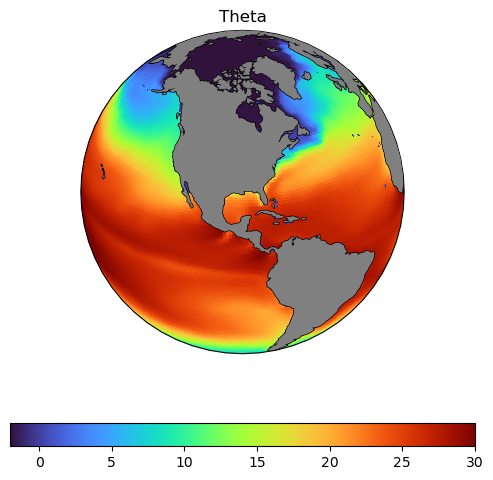

In [51]:
file_path='C:/Users/the_n/Desktop/sjsu/F24/CS185C/homework/hw3/testimg.png'
# make your figure here
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude= 30 ,central_longitude=-90))

# plot the temperature
plt.pcolormesh(longitude, latitude, Theta, vmin=-2, vmax=30, cmap='turbo',
                transform=ccrs.PlateCarree())
plt.colorbar(orientation = 'horizontal')

plt.gca().add_feature(cfeature.LAND, zorder=99, facecolor='grey')
plt.gca().coastlines()

# format the axes
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.title('Theta')
plt.savefig(file_path)
plt.show()

plt.close(fig)


## Part 3: Formulate a Plotting Function
When you are happy with your plot, make your code into a function that will take the year, month, and day as inputs, and output the figure into a given directory. 

In [62]:

def plot_panel(year,month,file_path):
    # fill in your function here
    fig = plt.figure(figsize=(6,6))
    ax = plt.axes(projection=ccrs.Orthographic(central_latitude= 30 ,central_longitude=-90))

    # plot the temperature
    plt.pcolormesh(longitude, latitude, Theta, vmin=-2, vmax=30, cmap='turbo',
                    transform=ccrs.PlateCarree())
    plt.colorbar(orientation = 'horizontal', label="Ocean Surface Temperature")

    plt.gca().add_feature(cfeature.LAND, zorder=99, facecolor='grey')
    plt.gca().coastlines()

    plt.title('{:02d}'.format(month)+'/'+str(year))
    plt.savefig(file_path)
    #plt.show()

    plt.close(fig)

Once the function is complete, use it to loop through all of the data to make a plot for each day of the year. The following lines of code will form the panels of a data visualization movie when using daily data. If you are using monthly data, update accordingly:

In [63]:
frames_folder = 'C:/Users/the_n/Desktop/sjsu/F24/CS185C/homework/hw3/frames'

file_path_list = []
# loop through the data and make a plot for each month
for year in range(2003,2010):
    for month in range(1,13):
        data_file = os.path.join(data_folder,'ECCO','Version4','Release4',
                          'interp_monthly','THETA','THETA'+'_'+str(year)+'_'+
                          '{:02d}'.format(month)+'.nc')
        
        # read in the temperature at the surface along with the
        # latitude and longitude information 
        ds = xr.open_dataset(data_file)
        longitude = np.array(ds['longitude'][:])
        latitude = np.array(ds['latitude'][:])
        Theta = np.array(ds['THETA'][:])
        ds.close()

        Theta = Theta[0,0,:,:]

        image_file = os.path.join(frames_folder,'THETA'+'_'+str(year)+'_'+
                          '{:02d}'.format(month)+'.png')
        
        file_path_list.append(image_file)

        plot_panel(year,month,image_file)

## Part 4: Compile Panels into a Movie
After creating all of the panels, stitch them together into a movie using moviepy:

In [65]:
# set the frames per second
fps = 3

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_path_list, fps=fps)

# write the video to a file
clip.write_videofile("Monthly_Ocean_Temp_2003-2009.mp4", fps)


Moviepy - Building video Monthly_Ocean_Temp_2003-2009.mp4.
Moviepy - Writing video Monthly_Ocean_Temp_2003-2009.mp4



Moviepy - Done !
Moviepy - video ready Monthly_Ocean_Temp_2003-2009.mp4


## Part 5: Interpret Features in the Movie
A movie gives a good visualization of the physical processes occurring in a model. Describe one feature you see in the movie and relate it to an oceanographic feature. It could be a feature discussed in class or another feature you noticed and researched on your own.

Answer: 
The main featured I notived in my movie was the surface temperature of the ocean fluctuating throughout the year, getting warmer from June to October, then going back to being colder from November to May. 
Another behavior shown in my movie is how the seasons are "flipped" in the southern hemisphere. In the summer months of June through October, the northern hemisphere has warmer oceans while the southern hemisphere has comparitively colder oceans. An then in the winter months the opposite is true, with the northern oceans getting colder and the southern oceans becoming warmer.
I hoped to show how ocean temperatures are increasing over time, even through the flucuations, however if visable in my movie, it is very hard to notice. I think that it could be made more obvious by using a longer time period than just 6 years.